# Introduction

### 1. Selection of the task and data source.
**In this project, I used Supervised learning, namely classification and regression tasks**

#### Connection of relevant libraries

In [1]:
#Для роботи з динними
import numpy as np
import pandas as pd

#Для роботи з візуальними динними
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#Для підготовки до машиного навачання
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

#Для машинного навчання (класифікація)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#Для машинного навчання (регресія) 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

#Для обробки та аналізу результатів
from statistics import mode # для обчислення моди
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # метрики для класифікації їх оцінка
# + статистичний аналіз
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Для ігнору попереджень
import warnings
warnings.filterwarnings('ignore')

### 2. Collection data
**About Dataset
Using the Columns:  
date  
precipitation  
temp_max  
temp_min  
wind**


**We are going to predict the weather condition:  
drizzle  
rain  
sun  
snow  
fog**

In [2]:
df = pd.read_csv("seattle-weather.csv")

In [3]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### 3. Data processing and analysis

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['date']

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [6]:
df.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


In [56]:
# 25%: Перший квартиль (Q1) або 25-й відсоток, який показує значення, за якими знаходяться 25% найменших значень.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [8]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [9]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

### Trying to find outliers in the data

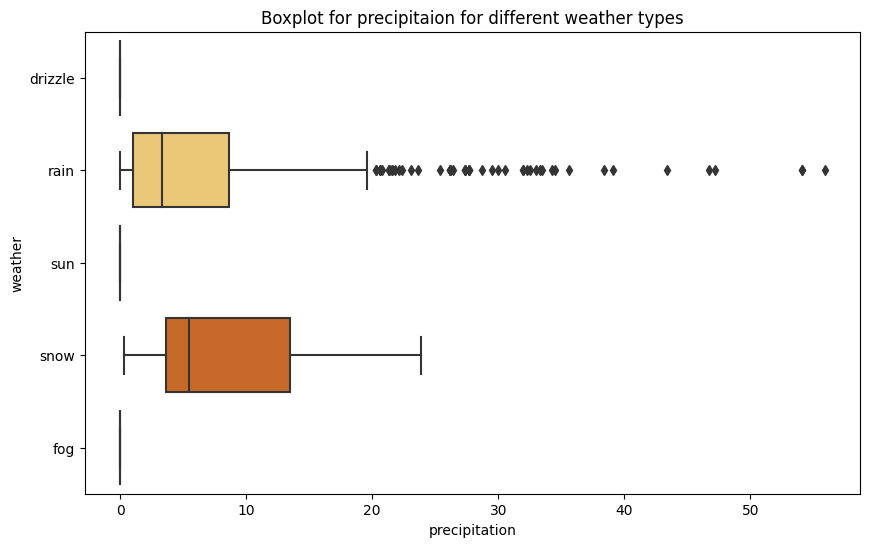

In [11]:
plt.figure(figsize=(10, 6))

x_variable = "precipitation" 
y_variable = "weather"
plot_data = df
color_palette = "YlOrBr"
plt.title("Boxplot for precipitaion for different weather types")
sns.boxplot(x=x_variable, y=y_variable, data=plot_data, palette=color_palette)

plt.show()

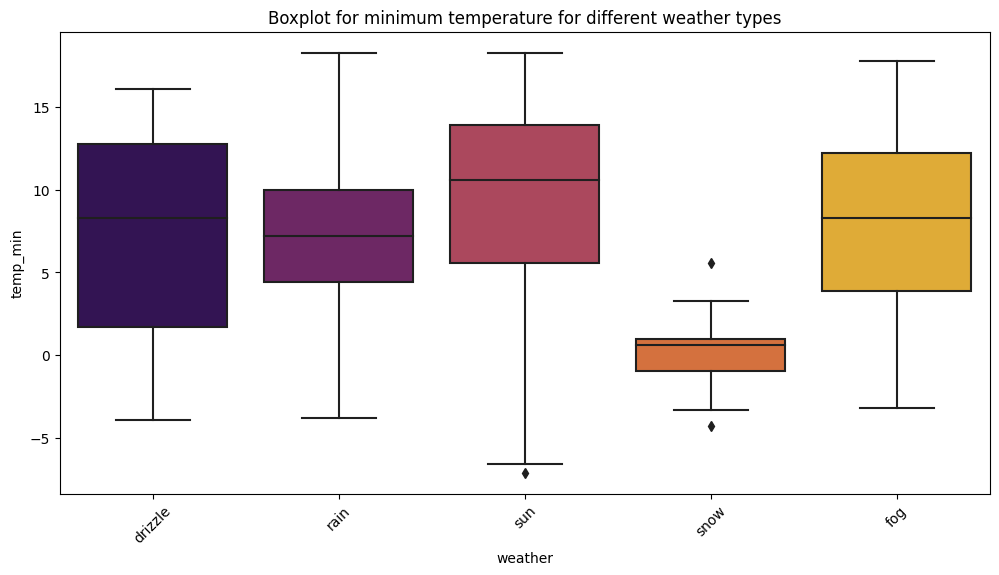

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_variable, y="temp_min", data=df, palette="inferno")
plt.title("Boxplot for minimum temperature for different weather types")
plt.xticks(rotation=45)
plt.show()

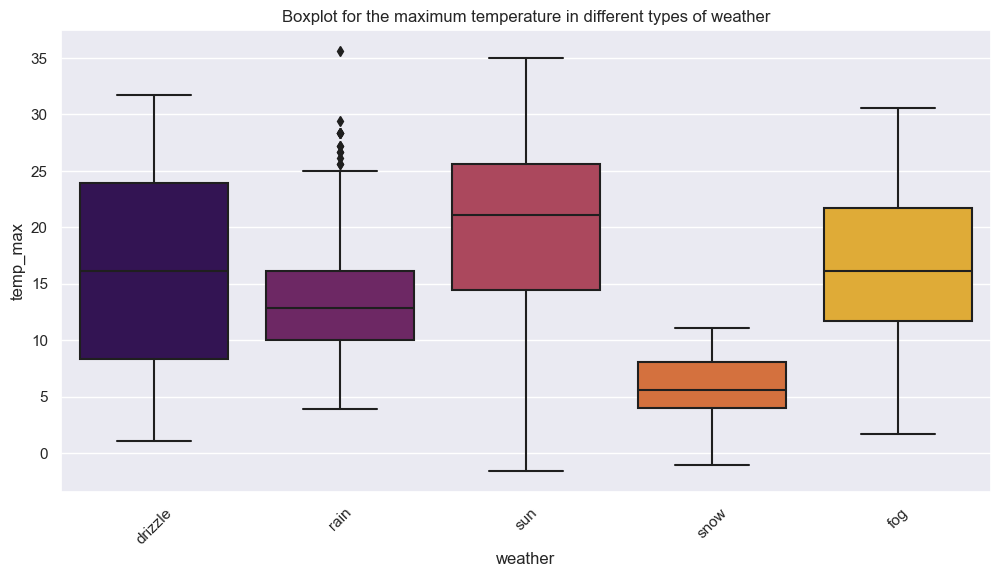

In [59]:
plt.figure(figsize=(12, 6))
y_variable = "weather"
sns.boxplot(x=y_variable, y="temp_max", data=df, palette="inferno")
plt.title("Boxplot for the maximum temperature in different types of weather")
plt.xticks(rotation=45)
plt.show()

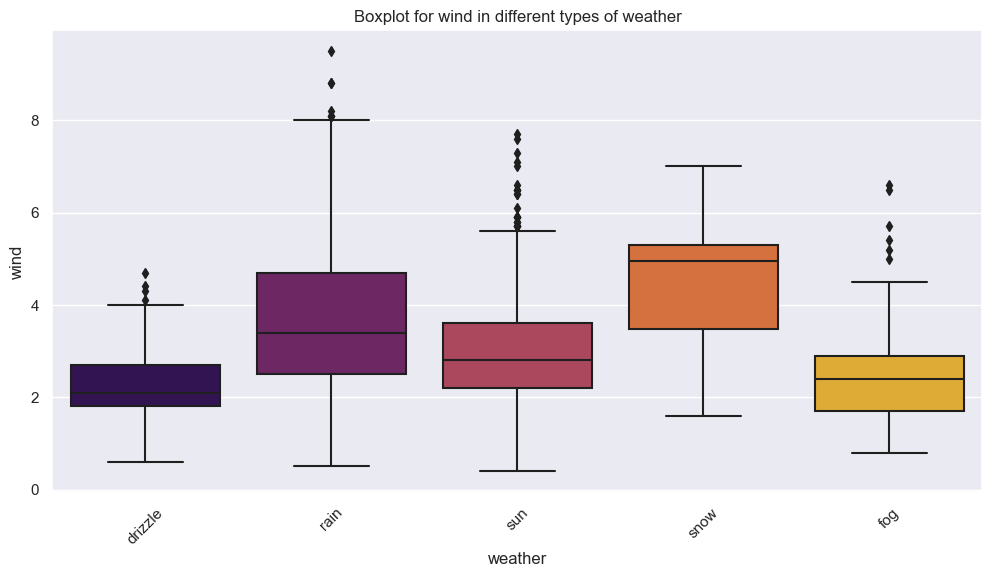

In [61]:
plt.figure(figsize=(12, 6))
y_variable = "weather"
sns.boxplot(x=y_variable, y="wind", data=df, palette="inferno")
plt.title("Boxplot for wind in different types of weather")
plt.xticks(rotation=45)
plt.show()

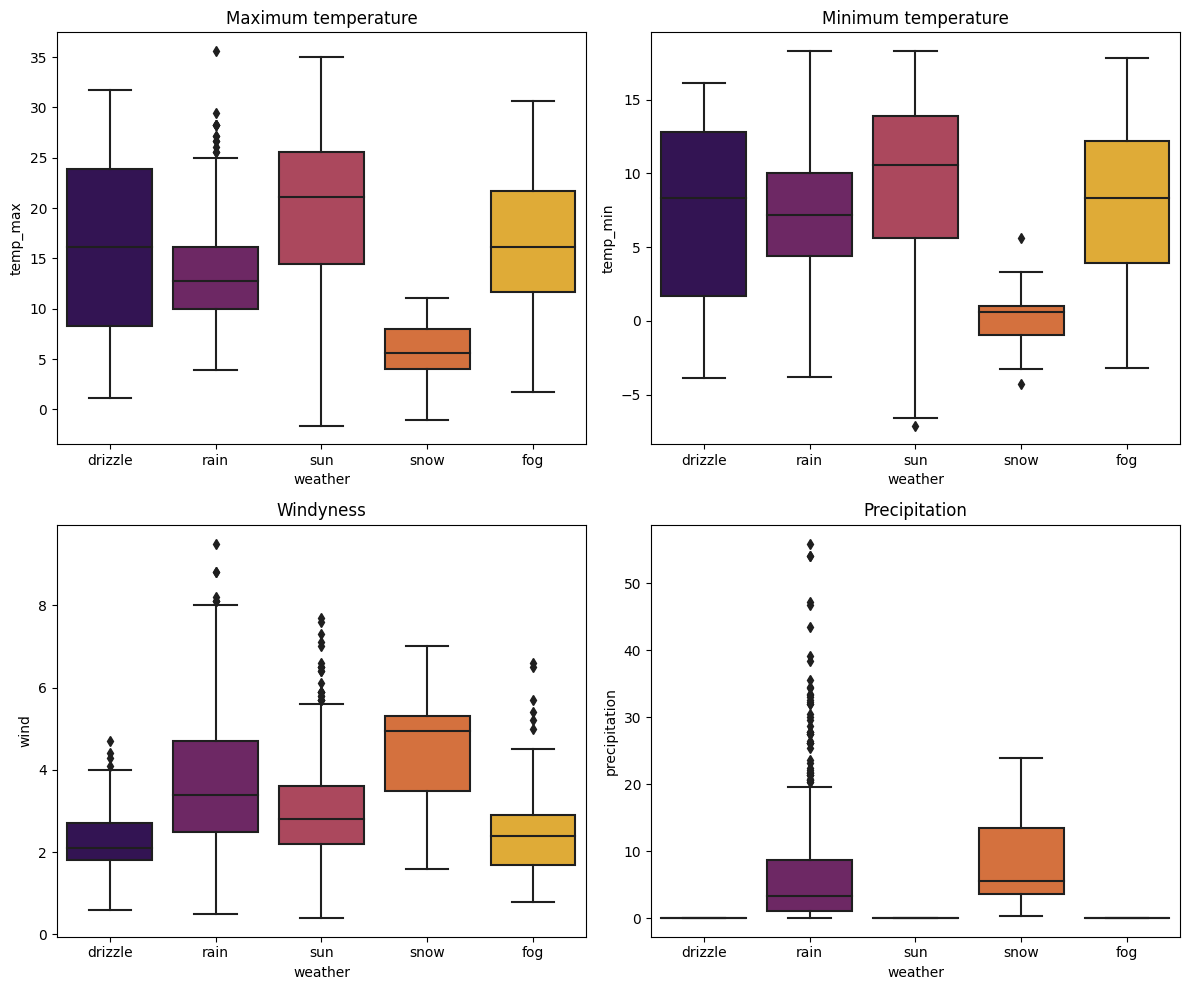

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x="weather", y="temp_max", data=df, palette="inferno", ax=axs[0, 0])
axs[0, 0].set_title("Maximum temperature")

sns.boxplot(x="weather", y="temp_min", data=df, palette="inferno", ax=axs[0, 1])
axs[0, 1].set_title("Minimum temperature")

sns.boxplot(x="weather", y="wind", data=df, palette="inferno", ax=axs[1, 0])
axs[1, 0].set_title("Windyness")

sns.boxplot(x="weather", y="precipitation", data=df, palette="inferno", ax=axs[1, 1])
axs[1, 1].set_title("Precipitation")

plt.tight_layout()
plt.show()

#### **No emissions were found**

### 4. Then we can to save the data to a new file with the processed data using

In [16]:
df.to_csv('seattle-weather_cheked.csv', index=False)

### 5. Data visualization

#### Graphs of the dependence of temperatures on the date:

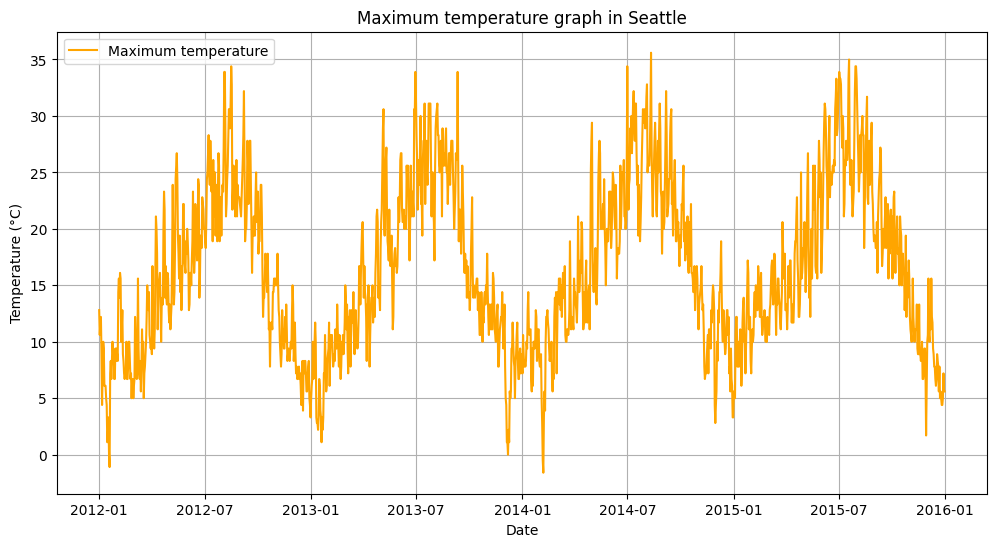

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max'], label='Maximum temperature', color='orange')
plt.title('Maximum temperature graph in Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

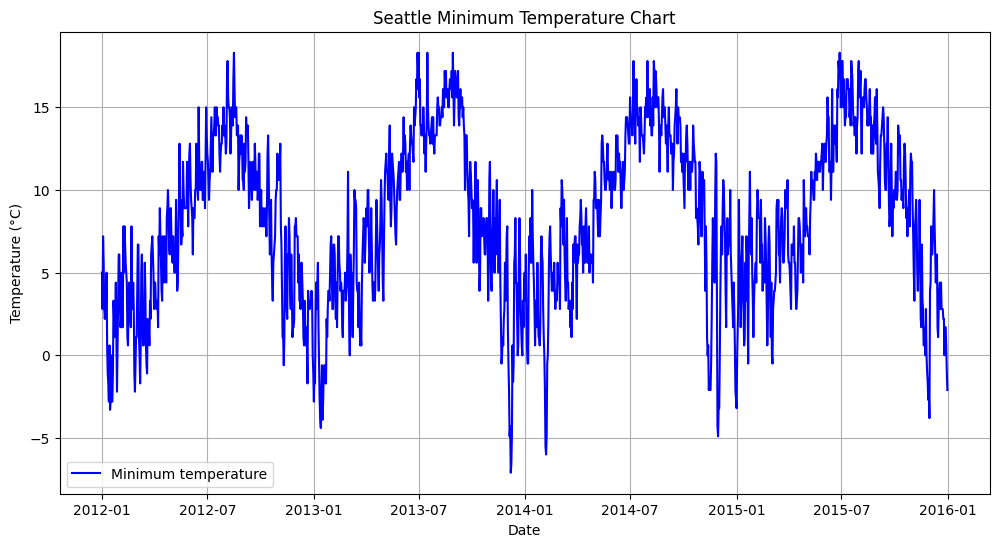

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_min'], label='Minimum temperature', color='blue')
plt.title('Seattle Minimum Temperature Chart')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.show()

In [19]:
# підготовка
min_temp = df['temp_min']
max_temp = df['temp_max']
dates = df['date']
average_temp = (df['temp_min'] + df['temp_max']) / 2

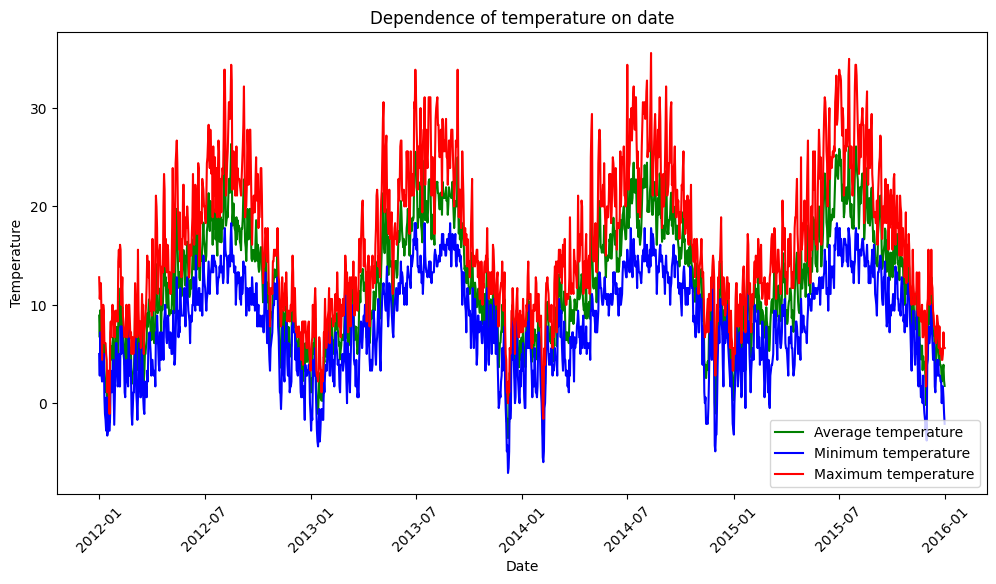

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(dates, average_temp, label='Average temperature', color='green')
plt.plot(dates, min_temp, label='Minimum temperature', color='blue')
plt.plot(dates, max_temp, label='Maximum temperature', color='red')
plt.title('Dependence of temperature on date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()

plt.show()

#### Rainfall histogram

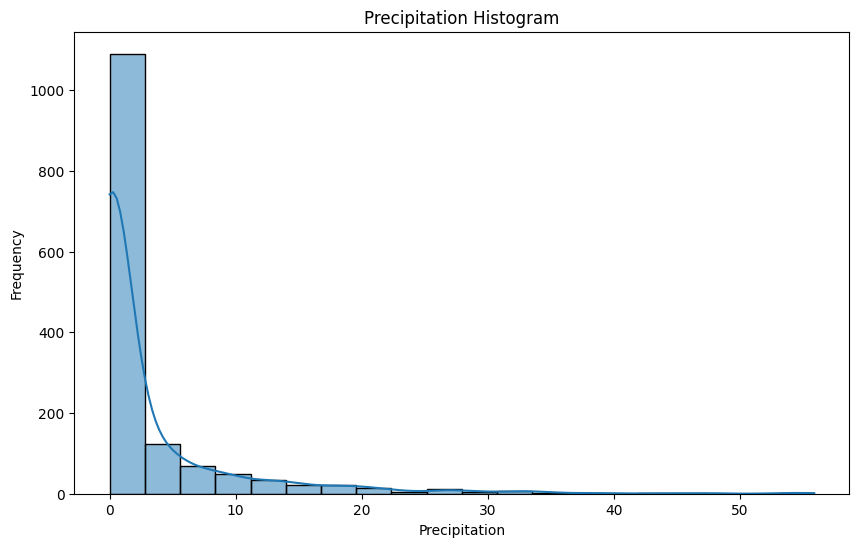

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['precipitation'], bins=20, kde=True) # bins - кількість рівнів на графіку \ kde(Kernel Density Estimate) - Оцінка щільності ядра 
plt.title('Precipitation Histogram')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')

plt.show()

#### Distribution of weather types (pie chart):

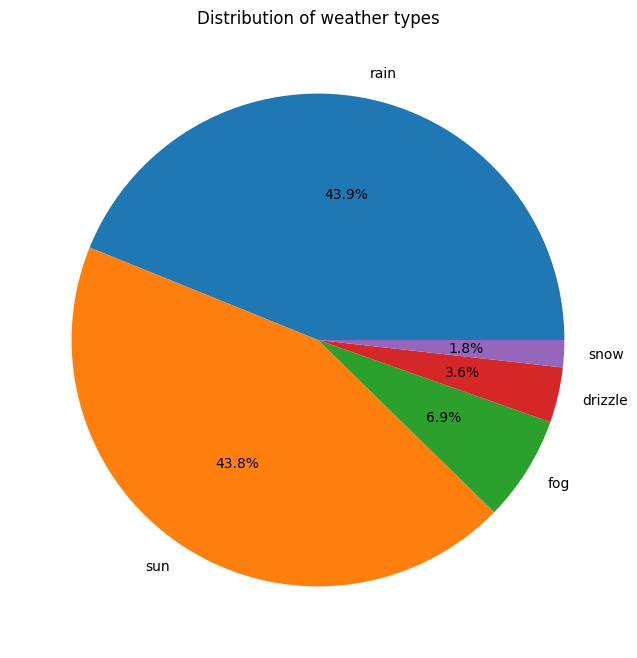

In [22]:
plt.figure(figsize=(8, 8))
weather_counts = df['weather'].value_counts()
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%') # autopct - додаємо відсотковий формат
plt.title('Distribution of weather types')
plt.show()

#### Effect of wind speed on temperature (point diagram):

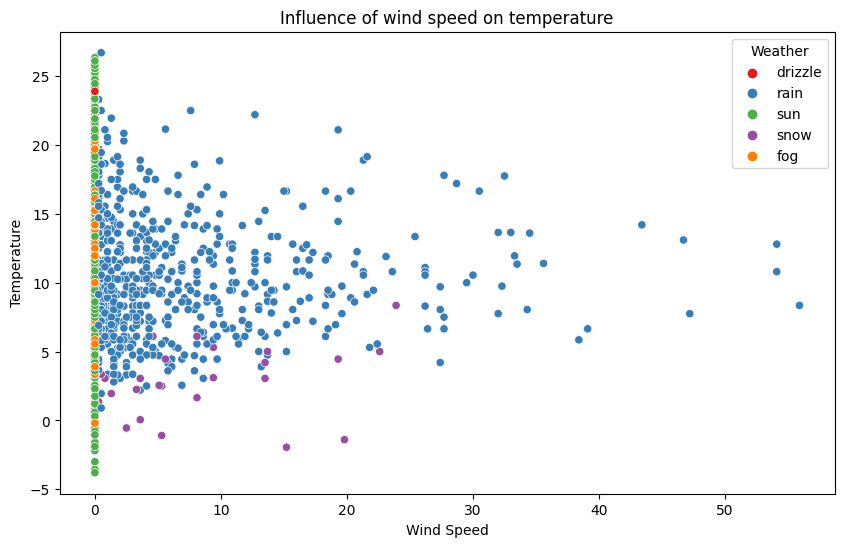

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='precipitation', y= average_temp, hue='weather', palette='Set1')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Influence of wind speed on temperature')
plt.legend(title='Weather')
plt.show()

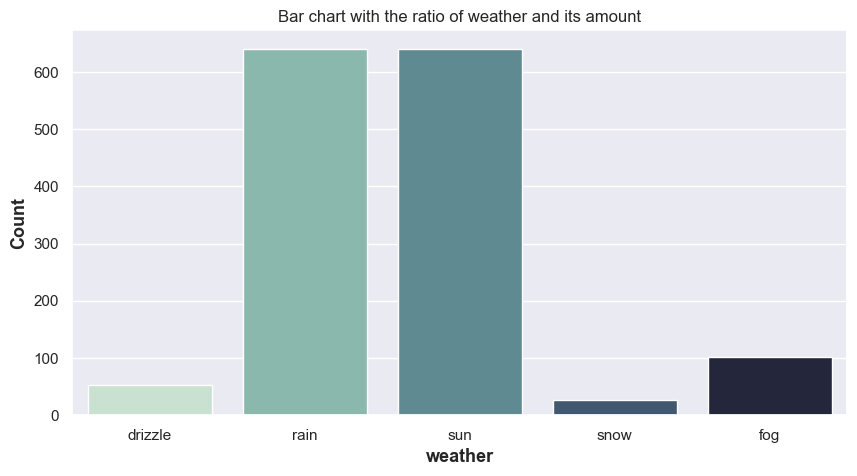

In [24]:
plt.figure(figsize=(10,5))
sns.set_theme()
# будуємо стовпчасту діаграму
sns.countplot(x = 'weather',data = df,palette="ch:start=.1,rot=-.4")
plt.xlabel("weather", fontweight='bold',size=13)
plt.ylabel("Count", fontweight='bold',size=13)
plt.title("Bar chart with the ratio of weather and its amount")
plt.show()

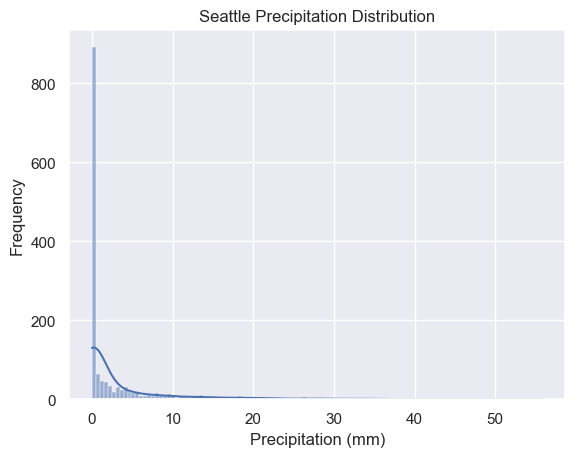

In [25]:
sns.histplot(df['precipitation'], kde=True)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Seattle Precipitation Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

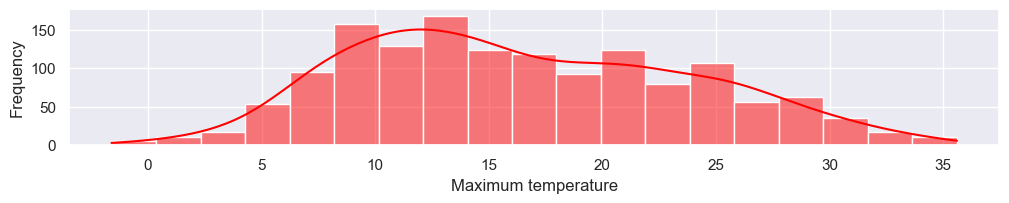

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(311)
sns.histplot(df['temp_max'], kde=True, color='red')
plt.xlabel('Maximum temperature')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

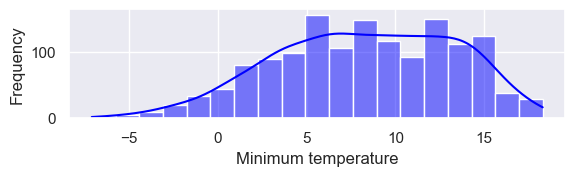

In [27]:
plt.subplot(312)
sns.histplot(df['temp_min'], kde=True, color='blue')
plt.xlabel('Minimum temperature')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

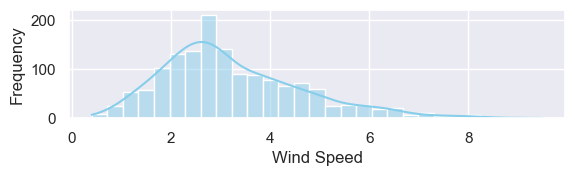

In [28]:
plt.subplot(313)
sns.histplot(df['wind'], kde=True, color='skyblue')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

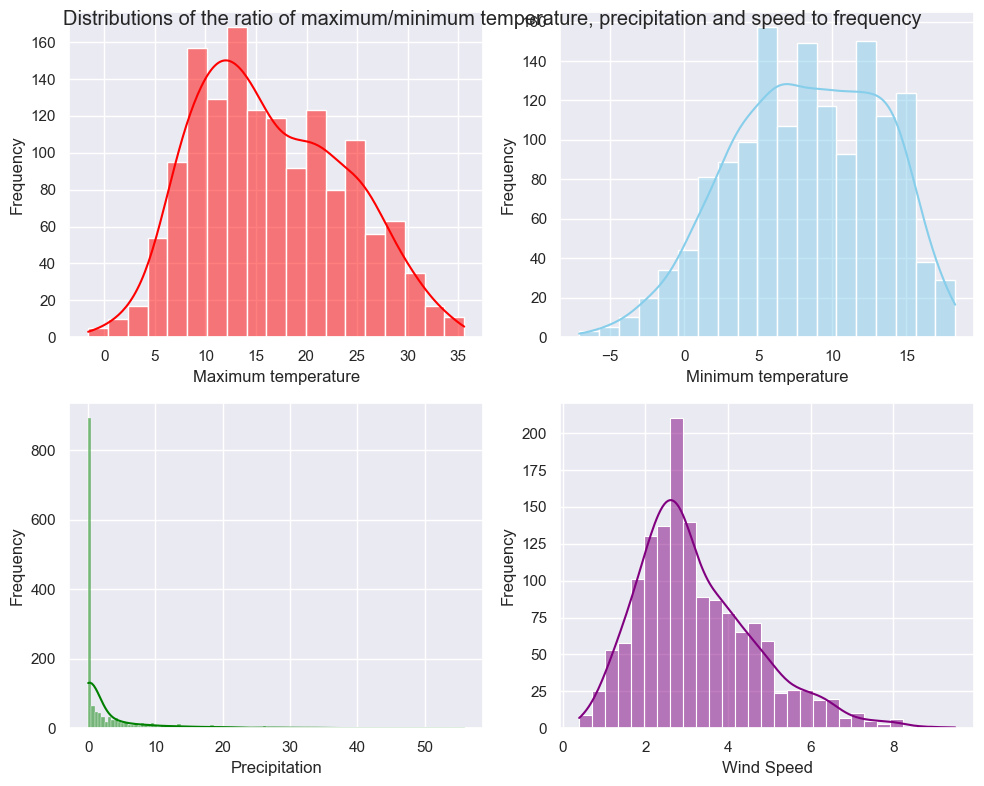

In [29]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
gs = gridspec.GridSpec(2, 2)

plt.subplot(gs[0])
sns.histplot(df['temp_max'], kde=True, color='red')
plt.xlabel('Maximum temperature')
plt.ylabel('Frequency')

plt.subplot(gs[1])
sns.histplot(df['temp_min'], kde=True, color='skyblue')
plt.xlabel('Minimum temperature')
plt.ylabel('Frequency')

plt.subplot(gs[2])
sns.histplot(df['precipitation'], kde=True, color='green')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')

plt.subplot(gs[3])
sns.histplot(df['wind'], kde=True, color='purple')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distributions of the ratio of maximum/minimum temperature, precipitation and speed to frequency')

plt.show()

#### Visualization of pairwise relations between numerical variables

<Figure size 1400x800 with 0 Axes>

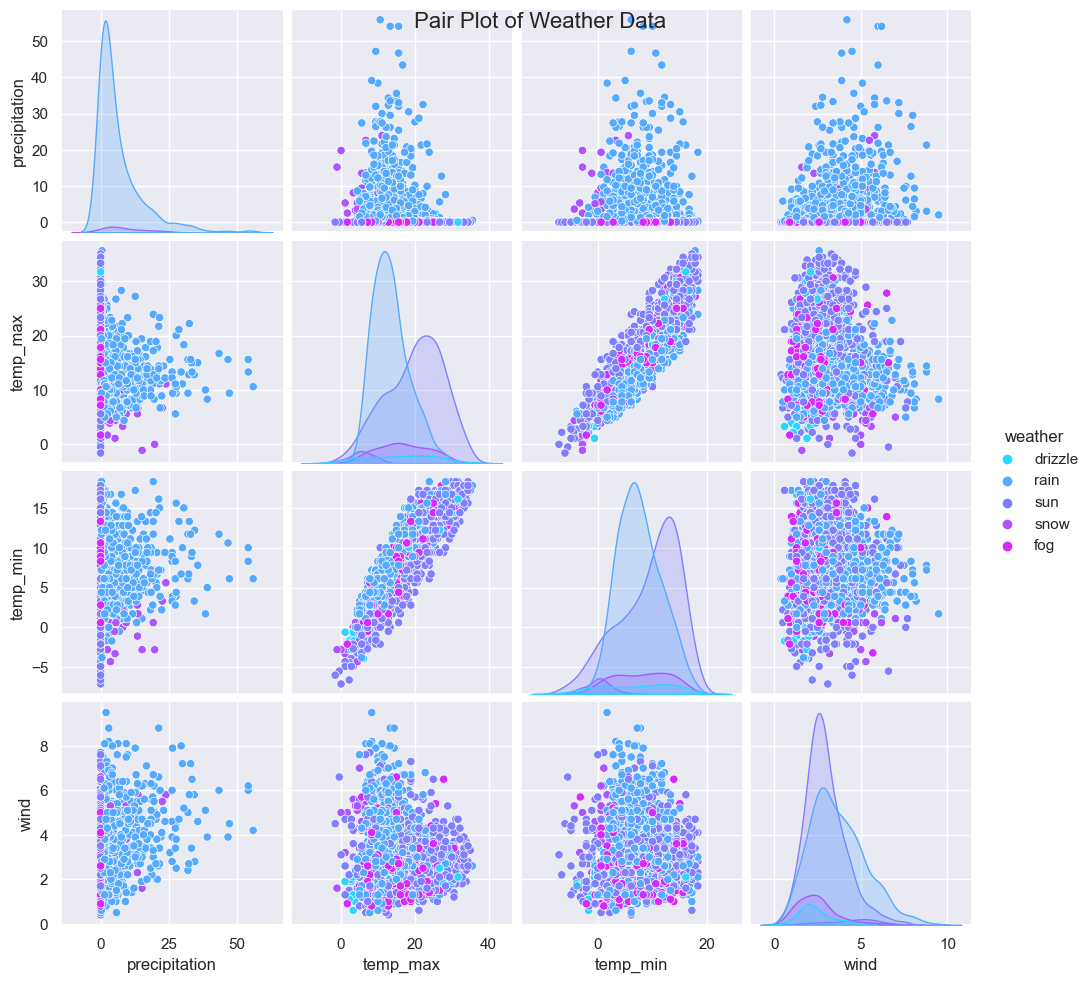

In [30]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date', axis=1), hue='weather', palette="cool") 
plt.suptitle("Pair Plot of Weather Data", size=16)
plt.show()

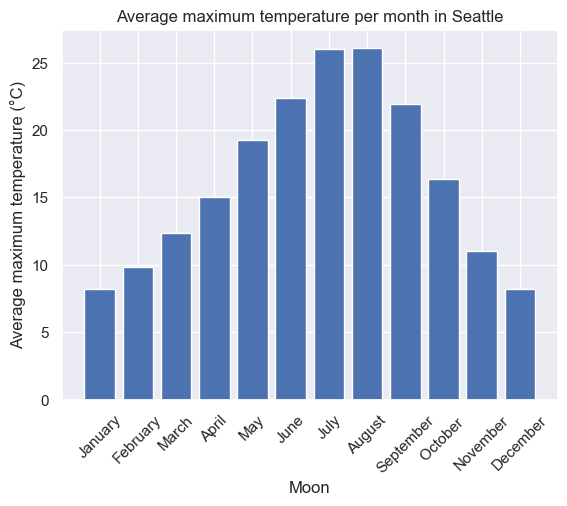

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
monthly_avg_temp = df.groupby('month')['temp_max'].mean()

plt.bar(monthly_avg_temp.index, monthly_avg_temp)
plt.xlabel('Moon')
plt.ylabel('Average maximum temperature (°C)')
plt.title('Average maximum temperature per month in Seattle')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October ', 'November', 'December'], rotation=45)
plt.show()

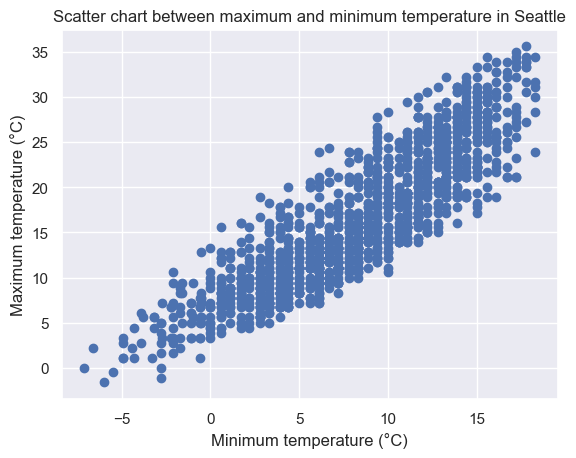

In [32]:
plt.scatter(df['temp_min'], df['temp_max'])
plt.title('Scatter chart between maximum and minimum temperature in Seattle')
plt.xlabel('Minimum temperature (°C)')
plt.ylabel('Maximum temperature (°C)')
plt.grid(True)

plt.show()

### Correlation value

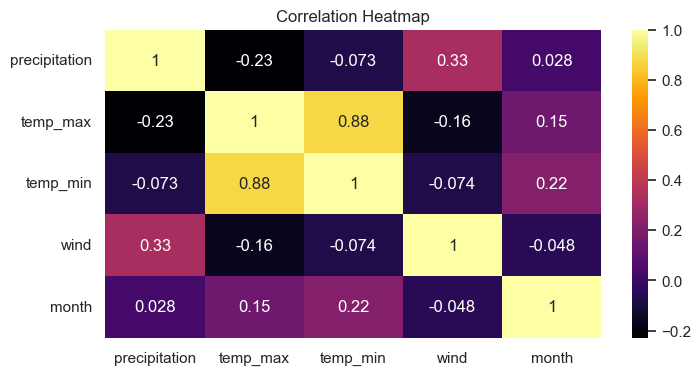

In [33]:
numeric_columns = df.select_dtypes(include=[np.number]) 
cor = numeric_columns.corr()

plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(cor, annot=True, cmap='inferno')
heatmap.set_title("Correlation Heatmap")

plt.show()

### Data preparation for classification #1

In [34]:
x_clf = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y_clf = df['weather']
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42) # даємо 20% на тестування \ початковий стан генератора - random_state

label_encoder = LabelEncoder()
# щоб декодувати тестові мітки погоди в числові значення
y_train_clf_encoded = label_encoder.fit_transform(y_train_clf)

### Learning classification models #1

In [35]:
classification_models = [DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

for model in classification_models:
    model.fit(x_train_clf, y_train_clf_encoded)

def ensemble_predict(x):
    classification_predictions = [model.predict([x]) for model in classification_models] 
    classification_result = mode([item[0] for item in classification_predictions]) 
    return classification_result

### Results #1 

In [36]:
input_data = [1.140175, 7.9, 2.8, 2.469818]
classification_result = ensemble_predict(input_data)

print("Classification Result:", label_encoder.inverse_transform([classification_result]))
# перетворює числовий індекс назад в назву погоди(рядковий клас)

Classification Result: ['rain']


In [37]:
input_data = [1.6, 14, 9, 3]

classification_result = ensemble_predict(input_data)

print("Classification Result:", label_encoder.inverse_transform([classification_result]))

Classification Result: ['rain']


### Data preparation for classification #2

In [38]:
x_clf = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y_clf = df['weather']
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_clf_encoded = label_encoder.fit_transform(y_train_clf)

### Learning classification models: DecisionTreeClassifier, RandomForestClassifier та XGBClassifier #1

In [39]:
decision_tree_clf_model = DecisionTreeClassifier()
random_forest_clf_model = RandomForestClassifier()
xgboost_clf_model = XGBClassifier()

decision_tree_clf_model.fit(x_train_clf, y_train_clf_encoded)
random_forest_clf_model.fit(x_train_clf, y_train_clf_encoded)
xgboost_clf_model.fit(x_train_clf, y_train_clf_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Creating an ensemble of classifiers

In [40]:
voting_models = [
    ('Decision Tree Classifier', classification_models[0]),
    ('Random Forest Classifier', classification_models[1]),
    ('XGBoost Classifier', classification_models[2])
]

### Training of an ensemble of classifiers

In [41]:
voting_classifier = VotingClassifier(estimators=voting_models, voting='hard')
# estimators - передаєм список моделей 
# hard - режим голосування. На основі всіх прогнозів(кожної моделі) і класифікаційне рішення прийняте на більшості голосів моделей
# є ще soft але там все базується на ймовірності
voting_classifier.fit(x_train_clf, y_train_clf_encoded)

VotingClassifier(estimators=[('Decision Tree Classifier',
                              DecisionTreeClassifier()),
                             ('Random Forest Classifier',
                              RandomForestClassifier()),
                             ('XGBoost Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_me...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

### Assessment of classification models

In [42]:
label_encoder = LabelEncoder()
y_test_clf_encoded = label_encoder.fit_transform(y_test_clf)

for name, model in voting_models:
    print(f"Модель: {name}")
    predictions = model.predict(x_test_clf)

    print(confusion_matrix(y_test_clf_encoded, predictions)) 
    # матриця помилок
    
    print(classification_report(y_test_clf_encoded, predictions)) 
    # звітт

    accuracy = accuracy_score(y_test_clf_encoded, predictions) 
    # точність
    print(f"Accuracy: {accuracy} \n")


# precision - класифікація позитивних прикладів для конкретного класу.
# Recall -  показує наскільки ефективно модель виявляє всі позитивні приклади для класу.
# f1-score для оцінки точності моделі, щось середнє між двома вище вказаними метриками
# Support - кількість прикладів в кожному класі
# Macro Avg: Середнє арифметичне значення Precision, Recall і F1-Score для всіх класів
# Weighted Avg: Зважене середнє Precision, Recall і F1-Score для всіх класів

# Зважене середнє (weighted average) - це середнє значення, де кожному об'єкту або спостереженню надається певна вага. 
# Вага вказує на важливість кожного об'єкта у середньому значенні

Модель: Decision Tree Classifier
[[  0   1   0   0   8]
 [  1   6   2   0  16]
 [  1   0 107   5   7]
 [  0   0   5   3   0]
 [  9  18   4   0 100]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.24      0.24      0.24        25
           2       0.91      0.89      0.90       120
           3       0.38      0.38      0.38         8
           4       0.76      0.76      0.76       131

    accuracy                           0.74       293
   macro avg       0.46      0.45      0.46       293
weighted avg       0.74      0.74      0.74       293

Accuracy: 0.7372013651877133 

Модель: Random Forest Classifier
[[  1   0   0   0   8]
 [  0   2   1   0  22]
 [  0   0 110   2   8]
 [  0   0   6   2   0]
 [  3   5   0   0 123]]
              precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.29      0.08      0.12        25
           2       

In [43]:
voting_classifier = VotingClassifier(estimators=voting_models, voting='hard')
voting_classifier.fit(x_train_clf, y_train_clf_encoded)
voting_predictions = voting_classifier.predict(x_test_clf)

print("Ансамбль (Voting Classifier):")
print(confusion_matrix(y_test_clf_encoded, voting_predictions)) 
print(classification_report(y_test_clf_encoded, voting_predictions))

voting_accuracy = accuracy_score(y_test_clf_encoded, voting_predictions)
print(f"Accuracy of Voting Classifier: {voting_accuracy}\n")

Ансамбль (Voting Classifier):
[[  1   0   0   0   8]
 [  0   4   1   0  20]
 [  0   0 110   3   7]
 [  0   0   5   3   0]
 [  5   2   2   0 122]]
              precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.67      0.16      0.26        25
           2       0.93      0.92      0.92       120
           3       0.50      0.38      0.43         8
           4       0.78      0.93      0.85       131

    accuracy                           0.82       293
   macro avg       0.61      0.50      0.52       293
weighted avg       0.80      0.82      0.80       293

Accuracy of Voting Classifier: 0.8191126279863481



#### Then it is better to use a Voting Classifier

### Using an ensemble for weather class prediction

In [44]:
input_data = [1.140175, 9.9, 2.8, 2.469818]

classification_result = voting_classifier.predict([input_data]) 

print("Classification Result:", label_encoder.inverse_transform(classification_result))

Classification Result: ['rain']


## Data preparation for regression

In [45]:
x_reg = df[['precipitation', 'temp_min', 'wind']]
y_reg = df['temp_max']

In [46]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

### Training regression models such as LinearRegression, RandomForestRegressor and XGBRegressor.

In [47]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_reg, y_train_reg)

LinearRegression()

In [48]:
random_forest_reg_model = RandomForestRegressor()
random_forest_reg_model.fit(x_train_reg, y_train_reg)

RandomForestRegressor()

In [49]:
xgboost_reg_model = XGBRegressor()
xgboost_reg_model.fit(x_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Creating an ensemble of regressors

In [50]:
voting_models = [
    ('Linear Regression', linear_reg_model),
    ('Random Forest', random_forest_reg_model),
    ('XGBoost', xgboost_reg_model)
]

voting_regressor = VotingRegressor(estimators=voting_models)

### Learning an ensemble of regressors

In [51]:
voting_regressor.fit(x_train_reg, y_train_reg)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Random Forest', RandomForestRegressor()),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=..._policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [52]:
y_pred_ensemble = voting_regressor.predict(x_test_reg)

### Estimating straight-line regression models

Model: Linear Regression
R-squared: 0.8048863326426142

RMSE: 3.3321942756910543


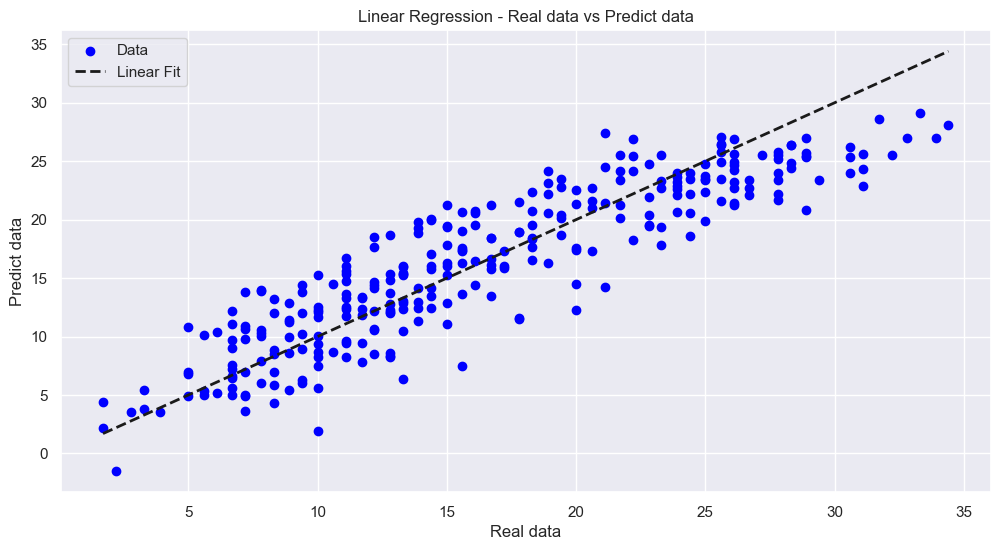

Model: Random Forest
R-squared: 0.8315964888098022

RMSE: 3.095722609960632


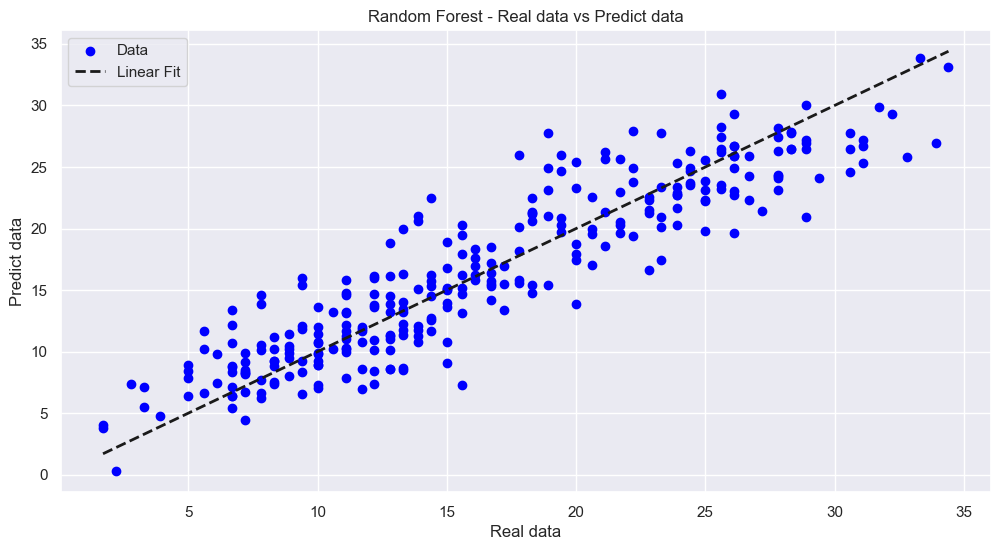

Model: XGBoost
R-squared: 0.8155243931121194

RMSE: 3.2400815553056455


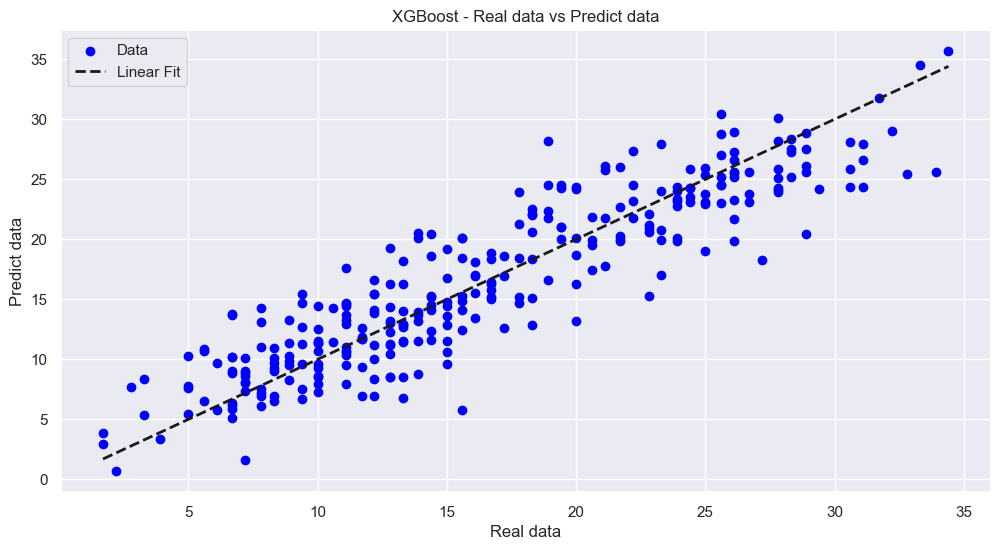

Model: Ensemble
R-squared: 0.8410954469555503

RMSE: 3.007146861927463


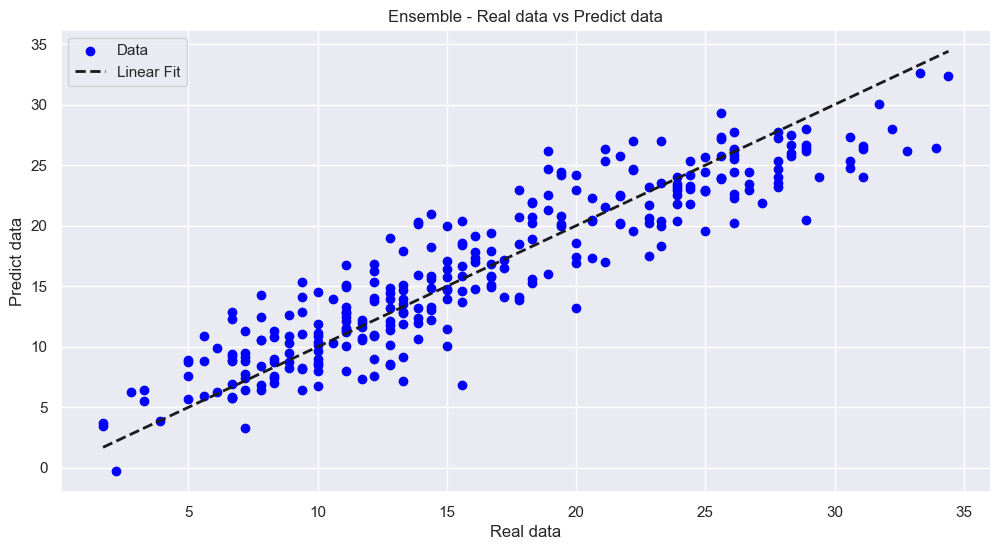

In [53]:
models = [
    ('Linear Regression', linear_reg_model),
    ('Random Forest', random_forest_reg_model),
    ('XGBoost', xgboost_reg_model),
    ('Ensemble', voting_regressor)
]

for name, model in models:
    
    y_pred = model.predict(x_test_reg)
    
    r2 = r2_score(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    
    print(f"Model: {name}")
    print(f"R-squared: {r2}\n") 
    # коефіцієнт детермінації
    print(f"RMSE: {rmse}") 
    # середньоквадратична помилка
    
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_reg, y_pred, c='blue', marker='o', label='Data')

    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2, label='Linear Fit')
    #lw - ширина лінії, k - чорний колір, тип лінії "--" 
    # [y_test_reg.min(), y_test_reg.max()] - ось це діапазони
    plt.xlabel("Real data")
    plt.ylabel("Predict data")
    plt.title(f"{name} - Real data vs Predict data")
    plt.grid(True)
    plt.legend()
    plt.show()


#### The ensemble turned out to be the most accurate, surprisingly)

### Using an ensemble of regressors for temperature forecasting

In [54]:
new_data = {
    'precipitation': 0,
    'temp_min': 5,
    'wind': 4.7
}
new_data_df = pd.DataFrame([new_data])

In [55]:
ensemble_prediction = voting_regressor.predict(new_data_df)
print("Ensemble predict:", ensemble_prediction)

Ensemble predict: [12.20282934]
